ERROR:tvDatafeed.main:error while signin


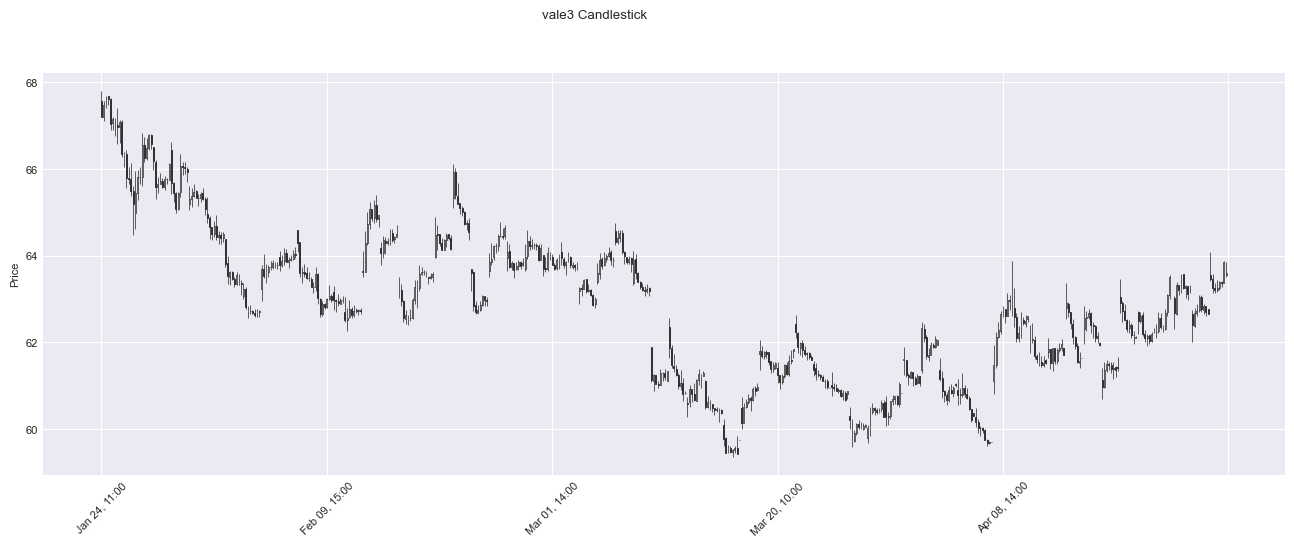

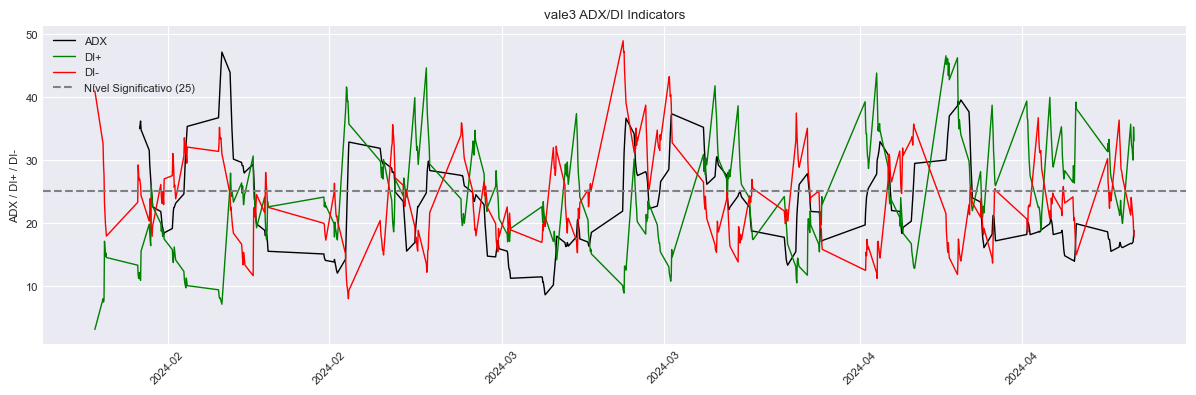

Valores finais —
ADX: 18.74 (Tendência fraca)
DI+: 32.98
DI-: 17.72
Diferença absoluta DI+ - DI-: 15.26 (em tendência)
Tendência: de alta fraca



In [9]:
from tvDatafeed import TvDatafeed, Interval
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

username = os.getenv('TRADINGVIEW_USERNAME')
password = os.getenv('TRADINGVIEW_PASSWORD')

username
password
tv = TvDatafeed(username, password)

ticker = 'vale3'

# Obtém os dados de preço das ações com intervalo diário e 1000 barras
data = tv.get_hist(symbol=ticker, exchange='BMFBOVESPA', interval=Interval.in_1_hour, n_bars=500)

# Calcula o ADX usando pandas_ta (isso também incluirá +DI e -DI no DataFrame)
data.ta.adx(append=True)

# Ajusta o índice para ser do tipo datetime, necessário para mplfinance
data.index = pd.to_datetime(data.index)

# Configura o estilo dos gráficos mplfinance
mpf_style = mpf.make_mpf_style(base_mpl_style='seaborn-v0_8-darkgrid', rc={'font.size': 8})


# Plota o gráfico de candlestick separadamente
mpf.plot(data, type='candle', style=mpf_style, volume=False, figratio=(12, 4), title=f'{ticker} Candlestick')

# Cria um novo gráfico para os indicadores técnicos usando matplotlib
fig, ax = plt.subplots(figsize=(12, 4))

# Plota o ADX, DI+ e DI- no mesmo gráfico
ax.plot(data.index, data['ADX_14'], label='ADX', color='black', linewidth=1)
ax.plot(data.index, data['DMP_14'], label='DI+', color='green', linewidth=1)
ax.plot(data.index, data['DMN_14'], label='DI-', color='red', linewidth=1)

# Adiciona uma linha horizontal para indicar o nível significativo do ADX
ax.axhline(25, color='grey', linestyle='--', label='Nível Significativo (25)')

# Configurações de legenda e título
ax.legend(loc='upper left')
ax.set_title(f'{ticker} ADX/DI Indicators')
ax.set_ylabel('ADX / DI+ / DI-')

# Melhora a formatação do eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calcula a diferença entre DI+ e DI- e sua diferença absoluta
soma_di = data['DMP_14'].iloc[-1] - data['DMN_14'].iloc[-1]
dif_abs_di = abs(soma_di)

# Determina a força da tendência
forca_tendencia = "forte" if data['ADX_14'].iloc[-1] > 25 else "fraca"

# Determina a direção da tendência
direcao_tendencia = "de alta" if soma_di > 0 else "de baixa"

# Verifica se o mercado está lateralizado com base na diferença absoluta entre DI+ e DI-
if dif_abs_di <= 5:
    estado_mercado = "lateralizado"
else:
    estado_mercado = "em tendência"

# Combina a direção e a força da tendência com o estado do mercado
descricao_tendencia = f"{direcao_tendencia} {forca_tendencia}" if estado_mercado == "em tendência" else "lateralizado"

# Exibe os valores de ADX e a força da tendência
print(f"Valores finais —")
print(f"ADX: {data['ADX_14'].iloc[-1]:.2f} (Tendência {forca_tendencia})")

# Exibe os valores de DI+ e DI-
print(f"DI+: {data['DMP_14'].iloc[-1]:.2f}")
print(f"DI-: {data['DMN_14'].iloc[-1]:.2f}")

# Exibe a diferença absoluta entre DI+ e DI- e o estado do mercado
print(f"Diferença absoluta DI+ - DI-: {dif_abs_di:.2f} ({estado_mercado})")

# Exibe a descrição da tendência
print(f"Tendência: {descricao_tendencia}\n")



In [3]:
from tvDatafeed import TvDatafeed, Interval
import pandas as pd
import pandas_ta as ta
import time
import os

# Autenticação no TvDatafeed
username = os.getenv('TRADINGVIEW_USERNAME')
password = os.getenv('TRADINGVIEW_PASSWORD')

username
password
tv = TvDatafeed(username, password)

# Lê a lista de tickers do arquivo Excel
tickers_df = pd.read_excel('tickers_filtrados_vol.xlsx', engine='openpyxl')
tickers = tickers_df['Ticker']

# Lista para armazenar os DataFrames de resultados temporários
resultados_temp = []

# Itera sobre cada ticker e busca os dados, calcula o ADX e a diferença entre DI+ e DI-
for ticker in tickers:
    try:
        # Obtém os dados de preço das ações com intervalo diário e 500 barras
        data = tv.get_hist(symbol=ticker, exchange='BMFBOVESPA', interval=Interval.in_1_hour, n_bars=500)
        time.sleep(0.5)
        # Calcula o ADX usando pandas_ta
        data.ta.adx(append=True)
        # Calcula a diferença entre DI+ e DI-
        data['DI_diff'] = data['DMP_14'] - data['DMN_14']
        # Adiciona os resultados ao DataFrame temporário
        ultima_linha = data.iloc[-1]
        resultados_temp.append(pd.DataFrame({'Ticker': [ticker], 'ADX': [ultima_linha['ADX_14']], 'DI+ - DI-': [ultima_linha['DI_diff']]}))
    except Exception as e:
        print(f"Erro ao processar {ticker}: {e}")

# Concatena todos os DataFrames temporários em um DataFrame final
resultados = pd.concat(resultados_temp)

# Ordena os resultados pelo ADX de forma decrescente
resultados.sort_values(by='ADX', ascending=False, inplace=True)

# Configura o Pandas para mostrar todas as linhas
pd.set_option('display.max_rows', None)

# Exibe o DataFrame como uma tabela HTML
from IPython.display import display, HTML
display(HTML(resultados.to_html(index=False)))


ERROR:tvDatafeed.main:error while signin
ERROR:tvDatafeed.main:Connection is already closed.
ERROR:tvDatafeed.main:no data, please check the exchange and symbol


Erro ao processar JALL3: 'NoneType' object has no attribute 'ta'


ERROR:tvDatafeed.main:Connection is already closed.
ERROR:tvDatafeed.main:no data, please check the exchange and symbol


Erro ao processar SOJA3: 'NoneType' object has no attribute 'ta'


ERROR:tvDatafeed.main:Connection is already closed.
ERROR:tvDatafeed.main:no data, please check the exchange and symbol


Erro ao processar PRNR3: 'NoneType' object has no attribute 'ta'


Ticker,ADX,DI+ - DI-
RCSL4,64.334530,-11.836444
PFRM3,52.635887,13.730875
KRSA3,48.304347,17.371052
TRPL4,47.525812,-21.519252
USIM5,46.357788,-26.449236
GFSA3,44.534597,-30.735027
PCAR3,43.180370,24.441164
RAIL3,42.883256,-19.536957
IFCM3,41.955143,21.404818
USIM3,41.749274,-21.167728
